# Using Baspy + Xarray to work with CMIP data

In [1]:
import baspy as bp
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import xarray as xr

%matplotlib inline 

In [2]:
catlg = bp.catalogue(dataset='cmip5', Experiment='historical', Frequency='mon', Var='tas', Model='HadGEM2-ES')
catlg.drop(columns=['Path','DataFiles'])

Updating cached catalogue...
>> Current cached values from catalogue (this can be extended by specifying additional values) <<
{'Experiment': ['rcp26', 'rcp45', 'piControl', 'rcp85', 'historical'], 'Frequency': ['mon']}



,Centre,Model,Experiment,Frequency,SubModel,CMOR,RunID,Version,Var,StartDate,EndDate
486768,MOHC,HadGEM2-ES,historical,mon,atmos,Amon,r2i1p1,v20110418,tas,185912,200512
486814,MOHC,HadGEM2-ES,historical,mon,atmos,Amon,r4i1p1,v20110418,tas,185912,200511
486860,MOHC,HadGEM2-ES,historical,mon,atmos,Amon,r3i1p1,v20110418,tas,185912,200512
486908,MOHC,HadGEM2-ES,historical,mon,atmos,Amon,r1i1p1,v20120928,tas,185912,200511


In [3]:
# Extract one model run
catlg = catlg.iloc[3]
catlg

Centre                                                     MOHC
Model                                                HadGEM2-ES
Experiment                                           historical
Frequency                                                   mon
SubModel                                                  atmos
CMOR                                                       Amon
RunID                                                    r1i1p1
Version                                               v20120928
Var                                                         tas
StartDate                                                185912
EndDate                                                  200511
Path          /badc/cmip5/data/cmip5/output1/MOHC/HadGEM2-ES...
DataFiles     tas_Amon_HadGEM2-ES_historical_r1i1p1_185912-1...
Name: 486908, dtype: object

## Using Xarray

In [4]:
### Read in multiple files as a Dataset
files = bp.get_files(catlg)
print('files =', files, '\n')
ds = xr.open_mfdataset(files)

'''
Alternatively, if you don't have access to the CMIP5 archive, you can download 
and use some CMIP6 sample data by running this line:
>>> ds = bp.XR.eg_Dataset()
'''

print(ds)

files = ['/badc/cmip5/data/cmip5/output1/MOHC/HadGEM2-ES/historical/mon/atmos/Amon/r1i1p1/v20120928/tas/tas_Amon_HadGEM2-ES_historical_r1i1p1_185912-188411.nc', '/badc/cmip5/data/cmip5/output1/MOHC/HadGEM2-ES/historical/mon/atmos/Amon/r1i1p1/v20120928/tas/tas_Amon_HadGEM2-ES_historical_r1i1p1_188412-190911.nc', '/badc/cmip5/data/cmip5/output1/MOHC/HadGEM2-ES/historical/mon/atmos/Amon/r1i1p1/v20120928/tas/tas_Amon_HadGEM2-ES_historical_r1i1p1_190912-193411.nc', '/badc/cmip5/data/cmip5/output1/MOHC/HadGEM2-ES/historical/mon/atmos/Amon/r1i1p1/v20120928/tas/tas_Amon_HadGEM2-ES_historical_r1i1p1_193412-195911.nc', '/badc/cmip5/data/cmip5/output1/MOHC/HadGEM2-ES/historical/mon/atmos/Amon/r1i1p1/v20120928/tas/tas_Amon_HadGEM2-ES_historical_r1i1p1_195912-198411.nc', '/badc/cmip5/data/cmip5/output1/MOHC/HadGEM2-ES/historical/mon/atmos/Amon/r1i1p1/v20120928/tas/tas_Amon_HadGEM2-ES_historical_r1i1p1_198412-200511.nc'] 

<xarray.Dataset>
Dimensions:    (bnds: 2, lat: 145, lon: 192, time: 1752)
Coo

In [5]:
# read a DataArray (e.g., a single variable) from the Dataset
da = ds.tas
da

<xarray.DataArray 'tas' (time: 1752, lat: 145, lon: 192)>
dask.array<shape=(1752, 145, 192), dtype=float32, chunksize=(300, 145, 192)>
Coordinates:
  * lat      (lat) float64 -90.0 -88.75 -87.5 -86.25 -85.0 -83.75 -82.5 ...
  * lon      (lon) float64 0.0 1.875 3.75 5.625 7.5 9.375 11.25 13.12 15.0 ...
    height   float64 1.5
  * time     (time) datetime64[ns] 1859-12-16 1860-01-16 1860-02-16 ...
Attributes:
    standard_name:     air_temperature
    long_name:         Near-Surface Air Temperature
    comment:           near-surface (usually, 2 meter) air temperature.
    units:             K
    original_name:     mo: m01s03i236
    cell_methods:      time: mean
    cell_measures:     area: areacella
    history:           2010-12-03T16:28:10Z altered by CMOR: Treated scalar d...
    associated_files:  baseURL: http://cmip-pcmdi.llnl.gov/CMIP5/dataLocation...

# Plotting

shape = (1752, 145, 192) 



(array([1.4756000e+04, 6.9845800e+05, 1.2227680e+06, 2.6831180e+06,
        3.4822860e+06, 3.5055740e+06, 7.7460610e+06, 1.0382627e+07,
        1.7711495e+07, 1.3285370e+06]),
 array([193.73047, 205.6619 , 217.5933 , 229.52473, 241.45615, 253.38757,
        265.319  , 277.25043, 289.18182, 301.11325, 313.04468],
       dtype=float32),
 <a list of 10 Patch objects>)

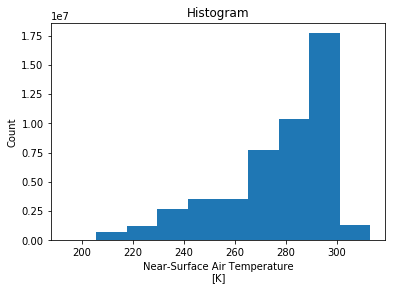

In [6]:
print('shape =', da.shape, '\n')

da.plot()

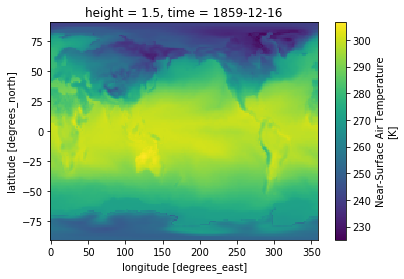

In [7]:
# select first time index
da.isel(time=0).plot()

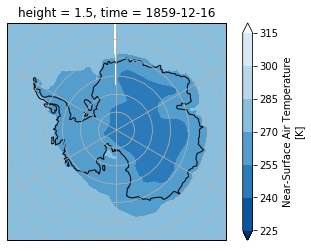

In [8]:
### Plotting
crs = ccrs.SouthPolarStereo(central_longitude=0.0)
ax = plt.subplot(projection=crs)
ax.set_extent([-180,180,-90,-60], ccrs.PlateCarree() )
ax.gridlines(ylocs=range(-90,-30,5))
da.isel(time=0).plot.contourf(ax=ax, transform=ccrs.PlateCarree(), cmap=plt.cm.Blues_r, extend='both')
ax.coastlines('110m', color='k')